# Práctica 1: Acceso a datos mediante pandas

## Introducción

En esta práctica accederemos a la Wikipedia para recabar los datos de población de un conjunto de países y realizaremos algunas representaciones gráficas.

En la página web titulada [*List of countries by past and projected future population*](https://en.wikipedia.org/wiki/List_of_countries_by_past_and_projected_future_population) se muestra la evolución de un buen número de países y territorios del mundo entre 1950 y 2050, organizada en un conjunto de tablas. En esta práctica combinaremos los datos de todos los países-territorios y todos los años en una sola trama de datos de pandas, y visualizaremos los cambios en la población de los distintos países-territorios.

### Utilizaremos en esta práctica las siguientes librerías:

[pandas](https://pandas.pydata.org/) proporciona estructuras de datos fáciles de usar y funciones de acceso a datos desde múltiples fuentes y formatos.

[matplotlib](https://matplotlib.org/) permite generar múltiples tipos de gráficos.  

### Realizaremos esta práctica en los siguientes pasos:

* Reunir los datos en una trama de datos pandas
* Visualizar los datos

A continuación indicamos algunas operaciones iniciales para incorporar al proyecto algunas librerías útiles.

In [1]:
# Importamos las librerías pandas y matplotlib
import pandas as pd
import matplotlib.pyplot as plt
from typing import Union

# Indicamos que los gráficos se muestren directamente debajo de las celdas de código en el cuaderno
%matplotlib inline

## Extraer las tablas a partir de un documento HTML de la Wikipedia

En este documento HTML el separador de decimales es el punto y el de miles es la coma. Utilizaremos el método `read_html()` de la librería pandas para leer las tablas que hay en el fichero HTML. Con la función `len()` podemos ver el número de tablas que hemos leído con datos de países (deberían ser tres).

In [2]:
# Identificamos y guardamos la URL en una variable

url = "https://en.wikipedia.org/wiki/List_of_countries_by_past_and_projected_future_population"

In [3]:
# Leemos las tablas del documento HTML
data_raw = pd.read_html(url)

# Imprimimos el número de tablas que hemos leído con datos de países mediante la función len()
print(len(data_raw))

# Seleccionamos las tablas que nos interesan
valid_data = data_raw[1:4]


5


## Construir una sola tabla con la información de población

Reunimos las tablas con los diferentes periodos en una sola tabla, mediante los métodos de pandas `join()`, `merge()`, o `concat()`, extraemos la cabecera y seleccionamos las columnas que corresponden solamente a fechas. Podemos utilizar el método `head()` para inspeccionar las primeras filas de la tabla y que la salida sea más manejable.

In [4]:
# Reunimos las tres tablas en una sola
# data = pd.merge(valid_data[0], valid_data[1], left_on="Country (or dependent territory)", right_on="Country (or dependent territory)")
# data = pd.merge(data, valid_data[2], left_on="Country (or dependent territory)", right_on="Country (or dependent territory)")

new_valid_data = valid_data.copy()
for k in range(3):
    new_valid_data[k] = new_valid_data[k].set_index(new_valid_data[k].columns[0])

data = pd.concat(new_valid_data, axis=1, join="inner")

# Imprimimos las primeras filas a modo de comprobación, mediante head()
data.head()

# Generamos una lista con las etiquetas de las columnas del DataFrame, mediante list()
print(list(data.columns))

# Seleccionamos de la cabecera las columnas correspondientes a las fechas mediante isnumeric()
# Las guardamos en una lista
# Puede ser útil el utilizar la noción de comprensión de listas, por sencillez
column_names = pd.Series(data.columns)
numeric_columns_bool = list(column_names.str.isnumeric())
numeric_columns = data.columns[numeric_columns_bool]

# Leemos la tabla por fechas y la almacenamos para su uso
# Imprimimos para verificar que es correcto
data = data[numeric_columns]
data.index.name = None
print(data.head())





['1950', '1955', '%', '1960', '%.1', '1965', '%.2', '1970', '%.3', '1975', '%.4', '1980', '%.5', '1985', '%', '1990', '%.1', '1995', '%.2', '2000', '%.3', '2005', '%.4', '2010', '%.5', '2015', '%.6', '2020', '%', '2025', '%.1', '2030', '%.2', '2035', '%.3', '2040', '%.4', '2045', '%.5', '2050', '%.6']
                1950  1955   1960   1965   1970   1975   1980   1985   1990  \
Afghanistan     8151  8892   9830  10998  12431  14133  15045  13120  13569   
Albania         1228  1393   1624   1884   2157   2402   2672   2957   3245   
Algeria         8893  9842  10910  11964  13932  16141  18807  22009  25191   
American Samoa    20    20     21     25     28     30     33     39     48   
Andorra            7     7      9     14     20     27     34     45     53   

                 1995  ...   2005   2010   2015   2020   2025   2030   2035  \
Afghanistan     19446  ...  26335  29121  32565  36644  41118  45665  50195   
Albania          3159  ...   3025   2987   3030   3075   3105   

## Algunas funciones de acceso a datos para una trama de pandas

Jugaremos con las posibilidades de pandas para manejar tablas mediante un conjunto sencillo de ejercicios.

### Ejercicio 1

Imprimir la tabla correspondiente a las poblaciones de Alemania, Andorra y Angola desde 2015 a 2025 a partir de una indexación mediante el uso de la propiedad `.loc`.

In [ ]:
# Creamos una subtabla
countries_to_locate = ["Germany", "Andorra", "Angola"]
date_ini = "2015"
date_fin = "2025"
data.loc[countries_to_locate, date_ini:date_fin]

,2015,2020,2025
Germany,80855,82983,80025
Andorra,86,86,86
Angola,19626,22485,25674


### Ejercicio 2

Imprimir la subtabla que va desde las filas 3 a 8 y desde las columnas 5 a 9 a partir de una indexación mediante el uso de la propiedad `.iloc`.

In [6]:
# Creamos una subtabla
data.iloc[3:8+1, 5:9+1]


,1975,1980,1985,1990,1995
American Samoa,30,33,39,48,54
Andorra,27,34,45,53,64
Angola,6051,7206,8390,9486,11000
Anguilla,7,7,7,9,10
Antigua and Barbuda,69,69,65,65,69
Argentina,26082,28370,30290,33036,35274


### Ejercicio 3

Imprimir la columna correspondiente al año 1955 mediante selección por el nombre de la columna.

In [7]:
# Mostramos una columna
data["1955"]


Afghanistan          8892
Albania              1393
Algeria              9842
American Samoa         20
Andorra                 7
                   ...   
Western Sahara         16
Yemen                5266
Zambia               2870
Zimbabwe             3410
World             2782099
Name: 1955, Length: 227, dtype: int64

### Ejercicio 4

Imprimir los datos de la fila número 15 mediante la propiedad `.iloc`.

In [8]:
# Seleccionamos una fila
data.iloc[15, :]


1950     45646
1955     49589
1960     54593
1965     60285
1970     67332
1975     76153
1980     87938
1985    102309
1990    112213
1995    121443
2000    132151
2005    144139
2010    156119
2015    168958
2020    169778
2025    178312
2030    185605
2035    191616
2040    196224
2045    199442
2050    201249
Name: Bangladesh, dtype: int64

### Ejercicio 5

Imprimir la población de Barbados en 1995 mediante la propiedad `.loc`.

In [9]:
# Seleccionamos una celda
data.loc["Barbados", "1955"]


228

### Ejercicio 6

Imprimir el valor máximo de las poblaciones de 1975 e identificar el país correspondiente.

In [10]:
# Utilizamos la función drop() para eliminar los valores totales mundiales
if "World" in data.index:
    data = data.drop("World", axis=0)

# Utilizamos la función max() para calcular el máximo
print(data.max())
print()

# Utilizamos idxmax() para identificar el país que corresponde al valor máximo
print(data.idxmax())


1950     562580
1955     607047
1960     651340
1965     716667
1970     822116
1975     920295
1980     987822
1985    1061876
1990    1153164
1995    1221056
2000    1268302
2005    1302285
2010    1336681
2015    1367486
2020    1397026
2025    1410807
2030    1460744
2035    1519491
2040    1571716
2045    1617238
2050    1656554
dtype: int64

1950    China
1955    China
1960    China
1965    China
1970    China
1975    China
1980    China
1985    China
1990    China
1995    China
2000    China
2005    China
2010    China
2015    China
2020    China
2025    China
2030    India
2035    India
2040    India
2045    India
2050    India
dtype: object


### Ejercicio 7

Imprimir los nombres de las filas con la propiedad `.index`.

In [11]:
# Nombres de las filas
data.index


Index(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia',
       ...
       'Uruguay', 'Uzbekistan', 'Vanuatu', 'Venezuela', 'Vietnam',
       'Wallis and Futuna', 'Western Sahara', 'Yemen', 'Zambia', 'Zimbabwe'],
      dtype='object', length=226)

## Dibujar la población de cuatro países en un año

Dibujar mediante un diagrama de barras la población de Argentina, Suecia, Polonia y Libia en 1995, ordenadas de menor a mayor, utilizando la librería matplotlib.

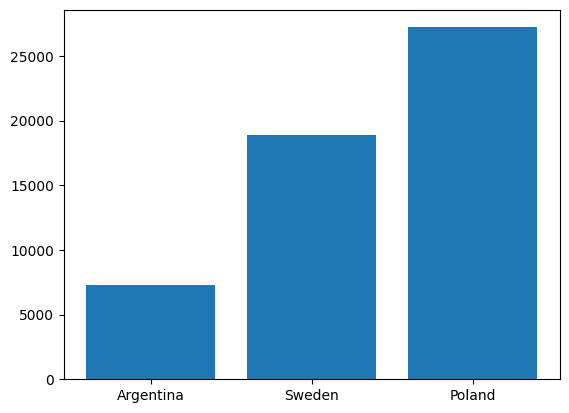

In [12]:
# Mediante la función plt.bar() de matplotlib
countries = ["Argentina", "Sweden", "Poland"]
dates = ["1955"]
data_plot = data.loc[countries, dates]
data_plot = data_plot.sort_values(by="1955")
plt.bar(countries, data_plot["1955"]);


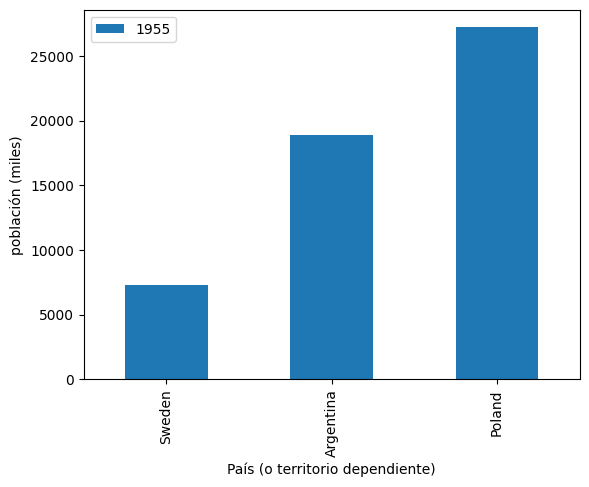

In [13]:
# Mediante la función .plot() de pandas

# Generamos una lista con los nombres de los países del enunciado
countries = ["Argentina", "Sweden", "Poland"]
dates = ["1955"]


# Utilizamos la opción .loc para seleccionar la subtabla que dibujaremos
data_plot = data.loc[countries, dates]


# Utilizamos la función .sort_values() para ordenar la subtabla y .plot(kind='bar') para dibujar    
data_plot = data_plot.sort_values(by="1955")
data_plot.plot(kind="bar")


# Podemos utilizar plt.ylabel() para especificar '# población (miles)'
plt.ylabel("población (miles)")


# Podemos utilizar plt.xlabel() para especificar 'País (o territorio dependiente)'
plt.xlabel("País (o territorio dependiente)");


## Dibujar la evolución de la población de cuatro países

Dibujar la evolución de la población en todo el periodo para los siguientes países: Alemania, España, Estados Unidos e Italia.

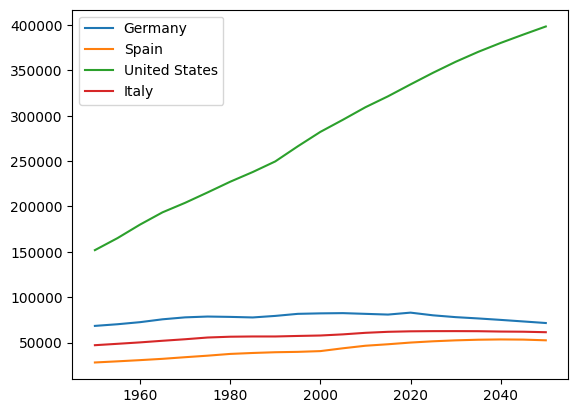

In [14]:
# Mediante la función plt.plot() de matplotlib
countries = ["Germany", "Spain", "United States", "Italy"]
data_plot = data.loc[countries]
dates = list(data_plot.columns)
dates = list(map(int, dates))
plt.plot(dates, data_plot.T, label=countries)
plt.legend()

Text(0, 0.5, 'Población')

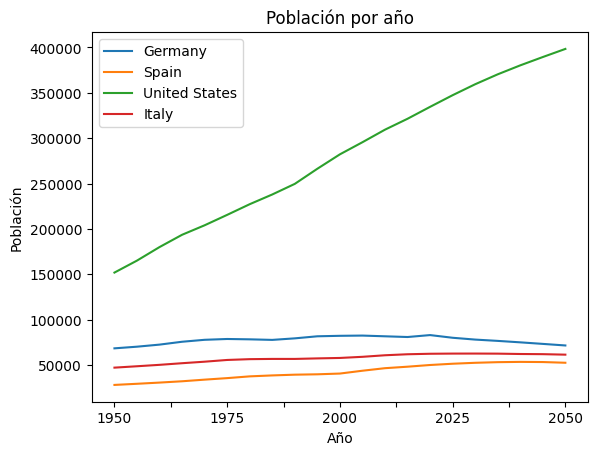

In [15]:
# Mediante la función .plot() de pandas

# Generamos una lista con los nombres de los países del enunciado
countries = ["Germany", "Spain", "United States", "Italy"]


# Generamos la subtabla correspondiente con la propiedad .loc
data_plot = data.loc[countries].T

    
# Utilizamos la función plot(kind='line') para dibujar
data_plot.plot(kind="line")


# Ponemos el titulo con title()
plt.title("Población por año")


# Etiquetamos con xlabel() e ylabel()
plt.xlabel("Año")
plt.ylabel("Población")


## Dibujar la evolución de los cinco países más populosos hasta 2010 y 2050  

Dibujar dos gráficas: una con la evolución para todo el periodo de los cinco países más populosos en 2010, y otra con los cinco países más populosos en 2050. Utilizaremos una función plot_populosos() a la que daremos como argumento el año de interés.

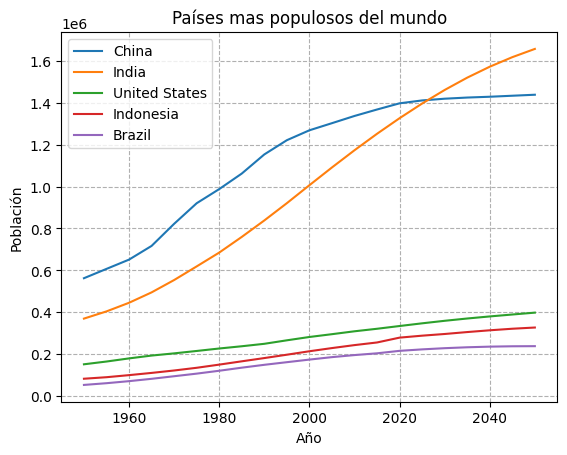

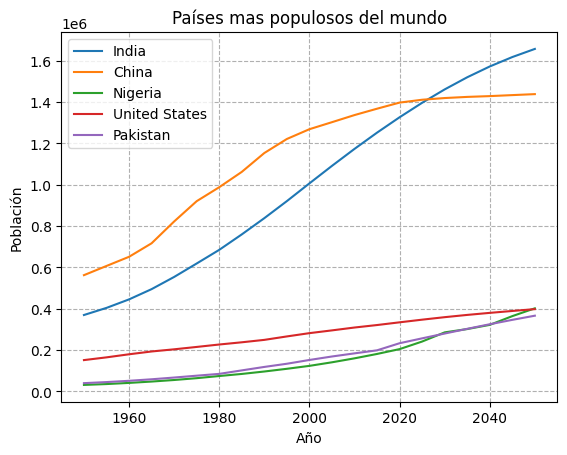

In [34]:
# Mediante la función plt.plot() de matplotlib

# Definimos la función plot_populosos()
def plot_populosos(tabla: pd.DataFrame, año: Union[str, int]) -> None:
    # Ordenamos la tabla según el año
    if año != str:
        año = str(año)
    sorted_table: pd.DataFrame = tabla.sort_values(by=año, ascending=False)
    sorted_table = sorted_table[:5]
    
    dates = tabla.columns
    dates = list(map(int, dates))
    countries = sorted_table.index.values
    
    plt.plot(dates, sorted_table.T, label=countries)
    plt.grid(ls="--")
    plt.title("Países mas populosos del mundo")
    plt.xlabel("Año")
    plt.ylabel("Población")
    plt.legend()
    plt.show()

plot_populosos(data, 2010)
plot_populosos(data, 2050)

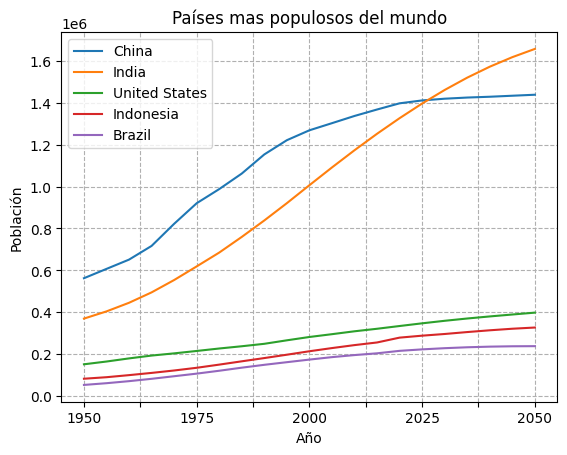

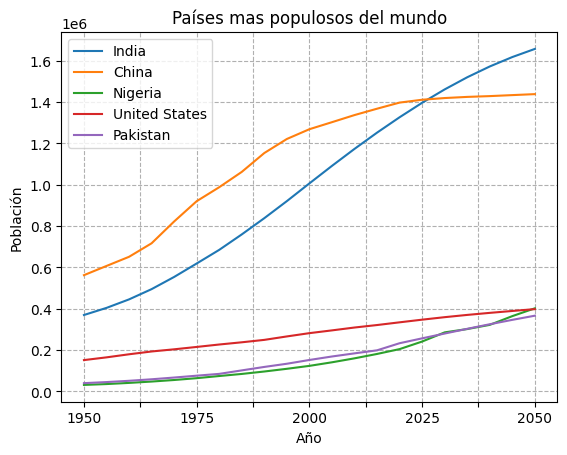

In [19]:
# Mediante la función .plot() de pandas

# Definimos la función plot_populosos()
def plot_populosos(tabla: pd.DataFrame, año: Union[str, int]) -> None:
    # Ordenamos la tabla según el año
    if año != str:
        año = str(año)
    sorted_table: pd.DataFrame = tabla.sort_values(by=año, ascending=False)
    
    # Seleccionamos los cinco primeros países mediante .iloc, y extraemos sus nombres
    sorted_table = sorted_table.iloc[:5]
    
    # Utilizamos los nombres para invocar la subtabla mediante .loc y dibujamos mediante plot(kind='line')
    sorted_table.T.plot(kind="line")
    plt.grid(ls="--")
    plt.title("Países mas populosos del mundo")
    plt.xlabel("Año")
    plt.ylabel("Población")
    
# Invocamos la función plot_populosos()
# Los valores mundiales no deben estar presentes en la tabla
plot_populosos(data, 2010)
plot_populosos(data, 2050)